### Introdução
####	Breve descrição da base de dados

O banco de dados utilizado é referente a mudanças de temperatura, coletado e disponibilizado pelo FAOSTAT (Food and Agriculture Organization of the United Nations) na mudança média de temperatura por país. O banco de dados cobre o período de 1961-2020. Os dados estão disponíveis por mês, estação e ano (considerando anomalias médias anuais, i.e., mudanças de temperatura com respeito a uma climatologia de base, correspondendo ao período de 1951-1980).

Fonte: https://www.kaggle.com/datasets/sevgisarac/temperature-change/data

O intuito dessa análise foi comparar as mudanças relativas de temperatura em 3 subsets de países, escolhidos de acordo com critérios geográficos e populacionais.

Com base no artigo "Change in cooling degree days with global mean temperature rise increasing from 1.5 °C to 2.0 °C", publicado na revista Nature, embora países na África central e subsaariana vem sofrendo e sofrerão com os maiores aumentos em temperatura em termos absolutos, são países no norte da Europa que sofrem e sofrerão com os maiores aumentos em temperatura em termos relativos.

A partir da análise do banco de dados da FAOSTAT, criamos gráficos que facilitam a visualização destes dados e corroboram o que foi apontado pelo estudo.

Fonte: https://www.nature.com/articles/s41893-023-01155-z
Fonte: https://theconversation.com/northern-europe-faces-biggest-relative-increase-in-uncomfortable-heat-and-is-dangerously-unprepared-new-research-209745

### Processamento

Para o tratamento de dados foram criados subsets baseados em regiões geográficas e características populacionais, de modo a facilitar a visualização e processamento de dados.

Foram removidas colunas julgadas desnecessárias. Também foram normalizados os valores de temperatura para plotagem do gráfico.

Os gráficos representam, respectivamente, as temperaturas dos verões, dos invernos e dos anos para cada subset.

### Conclusão

Os gráficos permitem a fácil visualização de um grave problema, possivelmente o maior desafio que a humanidade já enfrentou: uma significativa tendência, em diversas regiões geográficas, ao aumento de temperatura, em todas as estações do ano.

O resultado é consistente com o que têm apresentado inúmeras organizações como o IPCC (Intergovernmental Panel on Climate Change) e a NASA (National Aeronautics and Space Administration), que alertam para os perigos da mudança climática impulsionada pela queima de combustíveis fósseis e o efeito estufa.

Os gráficos explicitam essa tendência global de aquecimento. Um dos pontos de nota é a significativa mudança relativa em temperaturas do norte da Europa. Isso não significa, contudo, que o problema não será grave também nos trópicos. Uma análise futura poderá fazer uso de dados absolutos e não relativos para o propósito de alerta.

A análise cruzada com outros dados, como aqueles relativos à emissão de CO², pode nos dar uma ideia das desigualdades globais de um problema compartilhado. Fica o alerta de que os países do Sul Global sofrerão os devastadores efeitos de um problema que, historicamente, não é de sua responsabilidade.

Fonte: https://www.carbonbrief.org/analysis-which-countries-are-historically-responsible-for-climate-change/

### Bibliotecas necessárias

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Criando o Dataframe

In [38]:
df = pd.read_csv("FAOSTAT_data.csv")

### Pré-processamento dos dados

In [39]:
df = pd.read_csv("FAOSTAT_data.csv")

#limpando colunas

def processamento_df(df):
    df = df.drop(['Unit', 'Domain Code', 'Domain', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description'], axis=1)

    return df

In [40]:
# normalizando valores de mudança de temperatura

for column in df.columns:
        df["Value"] = (df["Value"] - df["Value"].min()) / (df["Value"].max() - df["Value"].min())

In [41]:
# criando os subsets utilizando os códigos de cada país

subset1 = df[df['Area Code (FAO)'].isin([21,44,9,170,236])]
subset2 = df[df['Area Code (FAO)'].isin([211,229,162,67,104])]
subset3 = df[df['Area Code (FAO)'].isin([37,233,133,206,159])]

In [42]:
df1 = processamento_df(subset1)
df2 = processamento_df(subset2)
df3 = processamento_df(subset3) 

In [43]:
# utilizando sample para conferir se a função rodou como o esperado

print(df1.sample(15))
print(df2.sample(15))
print(df3.sample(15))

        Area Code (FAO)                                Area  Months Code  \
25595                21                              Brazil         7003   
221994              236  Venezuela (Bolivarian Republic of)         7016   
48106                44                            Colombia         7004   
25543                21                              Brazil         7002   
26445                21                              Brazil         7020   
161548              170                                Peru         7009   
26282                21                              Brazil         7018   
221428              236  Venezuela (Bolivarian Republic of)         7004   
161413              170                                Peru         7007   
221508              236  Venezuela (Bolivarian Republic of)         7005   
221481              236  Venezuela (Bolivarian Republic of)         7005   
47909                44                            Colombia         7001   
48345       

In [44]:
# extraindo valores: verão, inverno e ano

verao_df1 = df1.loc[df1['Months Code'] == 7016]
inverno_df1 = df1.loc[df1['Months Code'] == 7018]
ano_df1 = df1.loc[df1['Months Code'] == 7020]

In [45]:
verao_df2 = df2.loc[df2['Months Code'] == 7018]
inverno_df2 = df2.loc[df2['Months Code'] == 7016]
ano_df2 = df2.loc[df2['Months Code'] == 7020]

In [46]:
verao_df3 = df3.loc[df3['Months Code'] == 7016]
inverno_df3 = df3.loc[df3['Months Code'] == 7018]
ano_df3 = df3.loc[df3['Months Code'] == 7020]

In [47]:
# criando variáveis (que serão utilizadas nos gráficos)
# e atribuindo a elas os valores extraídos da coluna 'Value' a partir de linhas específicas, a saber, os códigos de cada país

x1 = np.unique(verao_df1['Year'].to_numpy())
Argentina = verao_df1.loc[verao_df1['Area Code (FAO)'] == 9,  ['Value']]['Value'].to_numpy()
Brazil = verao_df1.loc[verao_df1['Area Code (FAO)'] == 21,  ['Value']]['Value'].to_numpy()
Colombia = verao_df1.loc[verao_df1['Area Code (FAO)'] == 44,  ['Value']]['Value'].to_numpy()
Peru = verao_df1.loc[verao_df1['Area Code (FAO)'] == 170,  ['Value']]['Value'].to_numpy()
Venezuela = verao_df1.loc[verao_df1['Area Code (FAO)'] == 236,  ['Value']]['Value'].to_numpy()

In [48]:
x1_inv = np.unique(inverno_df1['Year'].to_numpy())
Argentina_inv = inverno_df1.loc[inverno_df1['Area Code (FAO)'] == 9,  ['Value']]['Value'].to_numpy()
Brazil_inv = inverno_df1.loc[inverno_df1['Area Code (FAO)'] == 21,  ['Value']]['Value'].to_numpy()
Colombia_inv = inverno_df1.loc[inverno_df1['Area Code (FAO)'] == 44,  ['Value']]['Value'].to_numpy()
Peru_inv = inverno_df1.loc[inverno_df1['Area Code (FAO)'] == 170,  ['Value']]['Value'].to_numpy()
Venezuela_inv = inverno_df1.loc[inverno_df1['Area Code (FAO)'] == 236,  ['Value']]['Value'].to_numpy()

In [49]:
x1_ano = np.unique(ano_df1['Year'].to_numpy())
Argentina_ano = ano_df1.loc[ano_df1['Area Code (FAO)'] == 9,  ['Value']]['Value'].to_numpy()
Brazil_ano = ano_df1.loc[ano_df1['Area Code (FAO)'] == 21,  ['Value']]['Value'].to_numpy()
Colombia_ano = ano_df1.loc[ano_df1['Area Code (FAO)'] == 44,  ['Value']]['Value'].to_numpy()
Peru_ano = ano_df1.loc[ano_df1['Area Code (FAO)'] == 170,  ['Value']]['Value'].to_numpy()
Venezuela_ano = ano_df1.loc[ano_df1['Area Code (FAO)'] == 236,  ['Value']]['Value'].to_numpy()

In [50]:
x2 = np.unique(verao_df2['Year'].to_numpy())
Switzerland = verao_df2.loc[verao_df2['Area Code (FAO)'] == 211,  ['Value']]['Value'].to_numpy()
United_Kingdom = verao_df2.loc[verao_df2['Area Code (FAO)'] == 229,  ['Value']]['Value'].to_numpy()
Norway = verao_df2.loc[verao_df2['Area Code (FAO)'] == 162,  ['Value']]['Value'].to_numpy()
Finland = verao_df2.loc[verao_df2['Area Code (FAO)'] == 67,  ['Value']]['Value'].to_numpy()
Ireland = verao_df2.loc[verao_df2['Area Code (FAO)'] == 104,  ['Value']]['Value'].to_numpy()


In [51]:
x2_inv = np.unique(inverno_df2['Year'].to_numpy())
Switzerland_inv = inverno_df2.loc[inverno_df2['Area Code (FAO)'] == 211,  ['Value']]['Value'].to_numpy()
United_Kingdom_inv = inverno_df2.loc[inverno_df2['Area Code (FAO)'] == 229,  ['Value']]['Value'].to_numpy()
Norway_inv = inverno_df2.loc[inverno_df2['Area Code (FAO)'] == 162,  ['Value']]['Value'].to_numpy()
Finland_inv = inverno_df2.loc[inverno_df2['Area Code (FAO)'] == 67,  ['Value']]['Value'].to_numpy()
Ireland_inv = inverno_df2.loc[inverno_df2['Area Code (FAO)'] == 104,  ['Value']]['Value'].to_numpy()

In [52]:
x2_ano = np.unique(ano_df2['Year'].to_numpy())
Switzerland_ano = ano_df2.loc[ano_df2['Area Code (FAO)'] == 211,  ['Value']]['Value'].to_numpy()
United_Kingdom_ano = ano_df2.loc[ano_df2['Area Code (FAO)'] == 229,  ['Value']]['Value'].to_numpy()
Norway_ano = ano_df2.loc[ano_df2['Area Code (FAO)'] == 162,  ['Value']]['Value'].to_numpy()
Finland_ano = ano_df2.loc[ano_df2['Area Code (FAO)'] == 67,  ['Value']]['Value'].to_numpy()
Ireland_ano = ano_df2.loc[ano_df2['Area Code (FAO)'] == 104,  ['Value']]['Value'].to_numpy()

In [53]:
x3 = np.unique(verao_df3['Year'].to_numpy())
Central_African_Republic = verao_df3.loc[verao_df3['Area Code (FAO)'] == 37,  ['Value']]['Value'].to_numpy()
Burkina_Faso = verao_df3.loc[verao_df3['Area Code (FAO)'] == 233,  ['Value']]['Value'].to_numpy()
Mali = verao_df3.loc[verao_df3['Area Code (FAO)'] == 133,  ['Value']]['Value'].to_numpy()
#Sudan = verao_df3.loc[verao_df3['Area Code (FAO)'] == 206,  ['Value']]['Value'].to_numpy()
Nigeria = verao_df3.loc[verao_df3['Area Code (FAO)'] == 159,  ['Value']]['Value'].to_numpy()

# Os dados do Sudão foram descartados porque o fato de haver dados nulos nos anos prejudicava a plotagem do gráfico

In [54]:
x3_inv = np.unique(inverno_df3['Year'].to_numpy())
Central_African_Republic_inv = inverno_df3.loc[inverno_df3['Area Code (FAO)'] == 37,  ['Value']]['Value'].to_numpy()
Burkina_Faso_inv = inverno_df3.loc[inverno_df3['Area Code (FAO)'] == 233,  ['Value']]['Value'].to_numpy()
Mali_inv = inverno_df3.loc[inverno_df3['Area Code (FAO)'] == 133,  ['Value']]['Value'].to_numpy()
#Sudan = inverno_df3.loc[inverno_df3['Area Code (FAO)'] == 206,  ['Value']]['Value'].to_numpy()
Nigeria_inv = inverno_df3.loc[inverno_df3['Area Code (FAO)'] == 159,  ['Value']]['Value'].to_numpy()

In [55]:
x3_ano = np.unique(ano_df3['Year'].to_numpy())
Central_African_Republic_ano = ano_df3.loc[ano_df3['Area Code (FAO)'] == 37,  ['Value']]['Value'].to_numpy()
Burkina_Faso_ano = ano_df3.loc[ano_df3['Area Code (FAO)'] == 233,  ['Value']]['Value'].to_numpy()
Mali_ano = ano_df3.loc[ano_df3['Area Code (FAO)'] == 133,  ['Value']]['Value'].to_numpy()
#Sudan = inverno_df3.loc[inverno_df3['Area Code (FAO)'] == 206,  ['Value']]['Value'].to_numpy()
Nigeria_ano = ano_df3.loc[ano_df3['Area Code (FAO)'] == 159,  ['Value']]['Value'].to_numpy()

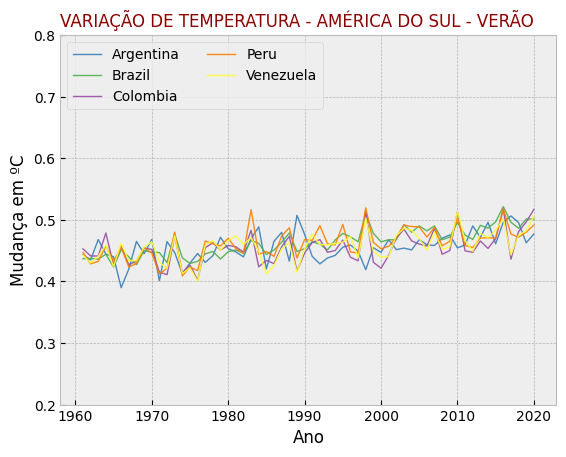

In [56]:
plotando_df1 = pd.DataFrame({
    'x': x1,  # Extract 'Year' column
    'Argentina': Argentina, 
    'Brazil': Brazil,
    'Colombia': Colombia,
    'Peru': Peru,
    'Venezuela': Venezuela
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df1.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df1['x'], plotando_df1[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

# estabelecendo uma escala no eixo y que faz sentido para os dados

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - AMÉRICA DO SUL - VERÃO", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()

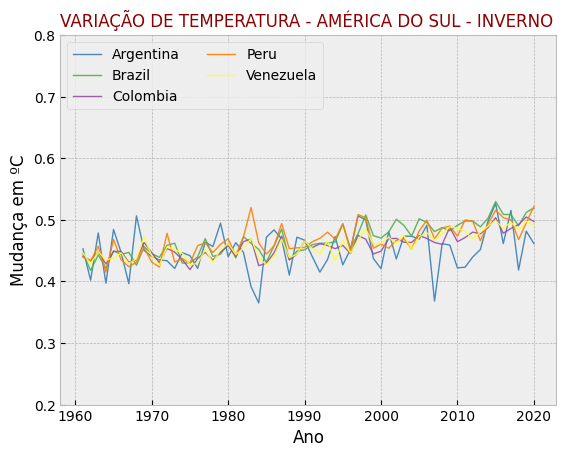

In [57]:
plotando_df1_inv = pd.DataFrame({
    'x': x1_inv,  # Extract 'Year' column
    'Argentina': Argentina_inv,
    'Brazil': Brazil_inv,
    'Colombia': Colombia_inv,
    'Peru': Peru_inv,
    'Venezuela': Venezuela_inv
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df1_inv.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df1_inv['x'], plotando_df1_inv[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - AMÉRICA DO SUL - INVERNO", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()

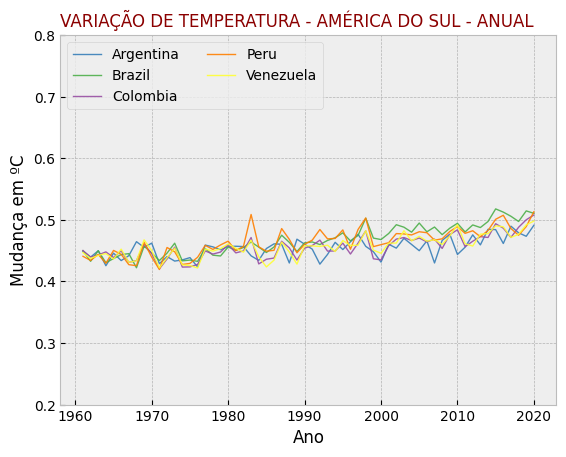

In [58]:
plotando_df1_ano = pd.DataFrame({
    'x': x1_ano,  # Extract 'Year' column
    'Argentina': Argentina_ano,
    'Brazil': Brazil_ano,
    'Colombia': Colombia_ano,
    'Peru': Peru_ano,
    'Venezuela': Venezuela_ano
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df1_ano.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df1_ano['x'], plotando_df1_ano[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - AMÉRICA DO SUL - ANUAL", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()

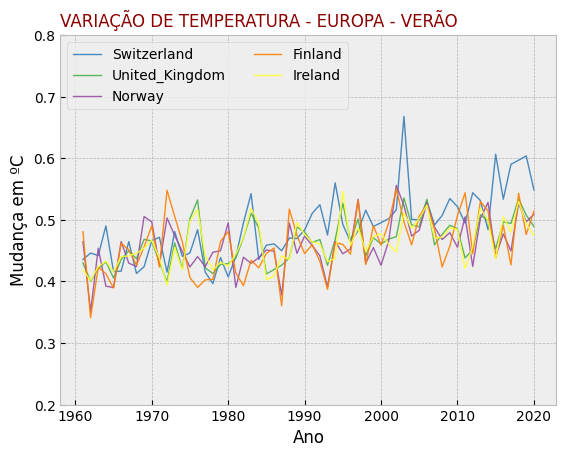

In [59]:
plotando_df2 = pd.DataFrame({
    'x': x2,  # Extract 'Year' column
    'Switzerland': Switzerland,
    'United_Kingdom': United_Kingdom,
    'Norway': Norway,
    'Finland': Finland,
    'Ireland': Ireland
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df2.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df2['x'], plotando_df2[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - EUROPA - VERÃO", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()

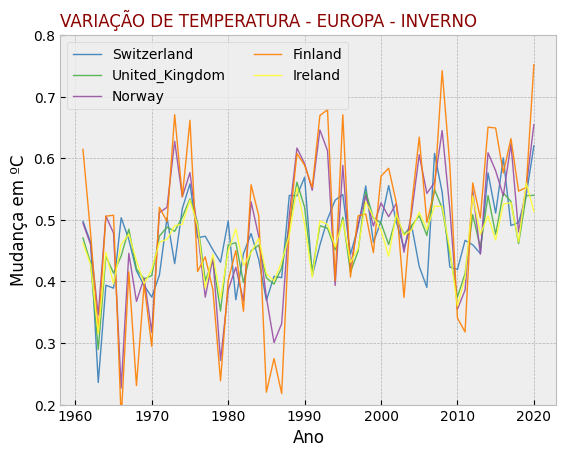

In [60]:
plotando_df2_inv = pd.DataFrame({
    'x': x2_inv,  # Extract 'Year' column
    'Switzerland': Switzerland_inv,
    'United_Kingdom': United_Kingdom_inv,
    'Norway': Norway_inv,
    'Finland': Finland_inv,
    'Ireland': Ireland_inv
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df2_inv.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df2_inv['x'], plotando_df2_inv[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - EUROPA - INVERNO", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()

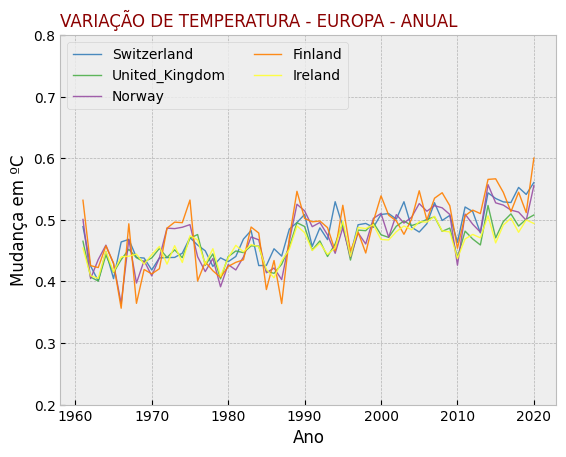

In [61]:
plotando_df2_ano = pd.DataFrame({
    'x': x2_ano,  # Extract 'Year' column
    'Switzerland': Switzerland_ano,
    'United_Kingdom': United_Kingdom_ano,
    'Norway': Norway_ano,
    'Finland': Finland_ano,
    'Ireland': Ireland_ano
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df2_ano.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df2_ano['x'], plotando_df2_ano[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - EUROPA - ANUAL", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()

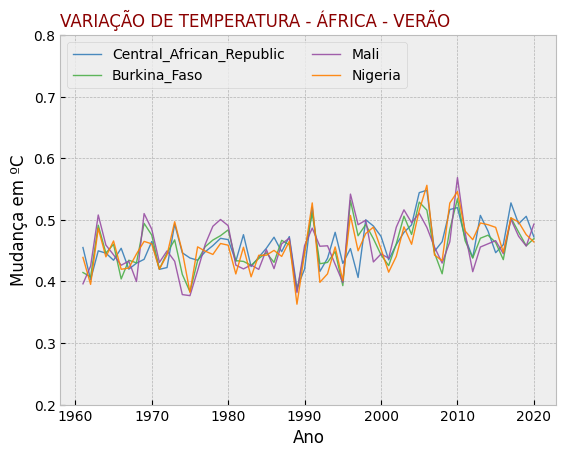

In [62]:
plotando_df3 = pd.DataFrame({
    'x': x3,  # Extract 'Year' column
    'Central_African_Republic': Central_African_Republic,
    'Burkina_Faso': Burkina_Faso,
    'Mali': Mali,  
    #'Sudan': Sudan, 
    'Nigeria': Nigeria
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df3.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df3['x'], plotando_df3[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - ÁFRICA - VERÃO", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()

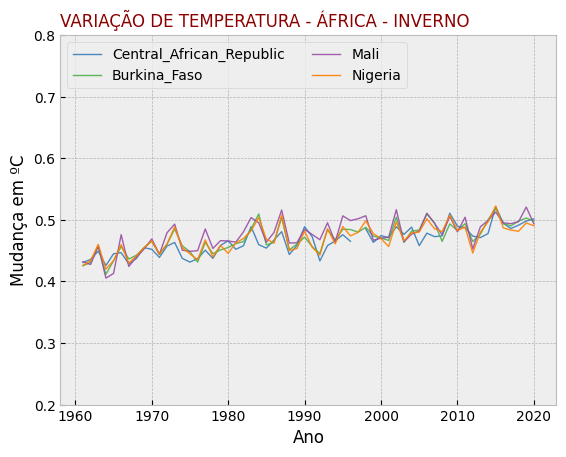

In [63]:
plotando_df3_inv = pd.DataFrame({
    'x': x3_inv,  # Extract 'Year' column
    'Central_African_Republic': Central_African_Republic_inv,
    'Burkina_Faso': Burkina_Faso_inv,
    'Mali': Mali_inv,  
    #'Sudan': Sudan, 
    'Nigeria': Nigeria_inv
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df3_inv.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df3_inv['x'], plotando_df3_inv[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - ÁFRICA - INVERNO", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()

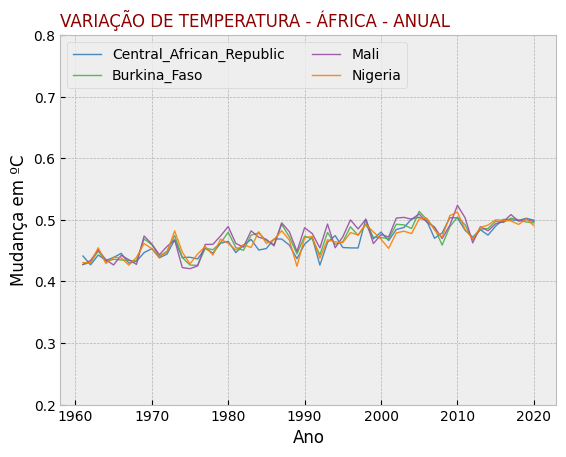

In [64]:
plotando_df3_ano = pd.DataFrame({
    'x': x3_ano,  # Extract 'Year' column
    'Central_African_Republic': Central_African_Republic_ano,
    'Burkina_Faso': Burkina_Faso_ano,
    'Mali': Mali_ano,  
    #'Sudan': Sudan, 
    'Nigeria': Nigeria_ano
})

 # Change the style of plot
plt.style.use('bmh')

# # Create a color palette
palette = plt.get_cmap('Set1')

# # Plot multiple lines
num = 0
for column in plotando_df3_ano.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df3_ano['x'], plotando_df3_ano[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.ylim(0.2, 0.8)
custom_x = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(custom_x, ['1960', '1970', '1980', '1990', '2000', '2010', '2020'])

plt.title("VARIAÇÃO DE TEMPERATURA - ÁFRICA - ANUAL", loc='left', fontsize=12, fontweight=0, color='darkred')
plt.xlabel("Ano")
plt.ylabel("Mudança em ºC")

plt.show()